In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [78]:
# Custom loss function
def compute_loss(X_0, X_1, a, b, t):
    # True Positives Lost (Class 1 points classified as Class 0)
    tp_lost = np.sum(a * X_1[:, 0] + b * X_1[:, 1] < t)
    
    # True Negatives Accepted (Class 0 points classified as Class 1)
    tn_accepted = np.sum(a * X_0[:, 0] + b * X_0[:, 1] >= t)
    
    # Loss is the sum of the penalties
    return tp_lost + tn_accepted 

# Calculate the movement vector for each selected point
def move_towards_boundary(X, mask, a, b, t):
    norm_factor = np.sqrt(a**2 + b**2)
    movement = np.outer((a * X[mask, 0] + b * X[mask, 1] - t) / norm_factor, np.array([a, b]) / norm_factor)
    X[mask] = X[mask] - movement

def plot_for(X_0, X_1, a, b, t, B):
    # Calculate initial loss
    loss_initial = compute_loss(X_0, X_1, a, b, t)

    # Movement region parameters
    mask_0 = (t - B <= a * X_0[:, 0] + b * X_0[:, 1]) & (a * X_0[:, 0] + b * X_0[:, 1] < t)
    mask_1 = (t - B <= a * X_1[:, 0] + b * X_1[:, 1]) & (a * X_1[:, 0] + b * X_1[:, 1] < t)

    # Move the distributions
    X_0_moved = X_0.copy()
    X_1_moved = X_1.copy()

    move_towards_boundary(X_0_moved, mask_0, a, b, t)
    move_towards_boundary(X_1_moved, mask_1, a, b, t)

    # Calculate new loss after movement
    loss_new = compute_loss(X_0_moved, X_1_moved, a, b, t)

    # Create the plot
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    x_min = np.min([X_0[:, 0], X_1[:, 0], X_0_moved[:, 0], X_1_moved[:, 0]])
    x_max = np.max([X_0[:, 0], X_1[:, 0], X_0_moved[:, 0], X_1_moved[:, 0]])
    y_min = np.min([X_0[:, 1], X_1[:, 1], X_0_moved[:, 1], X_1_moved[:, 1]])
    y_max = np.max([X_0[:, 1], X_1[:, 1], X_0_moved[:, 1], X_1_moved[:, 1]])

    # Plot 1: Initial Distribution
    ax[0].scatter(X_0[:, 0], X_0[:, 1], alpha=0.3, color='red', label='Class 0')
    ax[0].scatter(X_1[:, 0], X_1[:, 1], alpha=0.3, color='blue', label='Class 1')
    ax[0].plot(np.linspace(-50, 50, 100), (t - a * np.linspace(-50, 50, 100)) / b, color='black', linestyle='--')
    ax[0].set_xlim(x_min, x_max)
    ax[0].set_ylim(y_min, y_max)
    ax[0].set_title(f'Initial Distribution\nLoss: {loss_initial:.2f}')
    ax[0].set_xlabel('Feature 1')
    ax[0].set_ylabel('Feature 2')
    ax[0].legend()

    # Plot 2: Distribution After Movement
    ax[1].scatter(X_0_moved[:, 0], X_0_moved[:, 1], alpha=0.3, color='red', label='Class 0')
    ax[1].scatter(X_1_moved[:, 0], X_1_moved[:, 1], alpha=0.3, color='blue', label='Class 1')
    ax[1].plot(np.linspace(-50, 50, 100), (t - a * np.linspace(-50, 50, 100)) / b, color='black', linestyle='--')
    ax[1].set_xlim(x_min, x_max)
    ax[1].set_ylim(y_min, y_max)
    ax[1].set_title(f'After Movement\nLoss: {loss_new:.2f}')
    ax[1].set_xlabel('Feature 1')
    ax[1].set_ylabel('Feature 2')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

def w(beta, gamma):
    """
    Applies the transformation to beta.
    
    Args:
    beta (float): The input weight.
    gamma (float): The gamma parameter for the transformation.

    Returns:
    float: The transformed weight.
    """
    return np.exp(-(-np.log(beta))**gamma)

In [79]:
# Set up the feature space
np.random.seed(42)
n_samples = 1000

# Parameters for the normal distributions
mean_0 = [1, 1]
cov_0 = [[1, 0.5], [0.5, 1]]

mean_1 = [2, 2]
cov_1 = [[1, -0.5], [-0.5, 1]]

# Generate samples for both classes
X_0 = np.random.multivariate_normal(mean_0, cov_0, n_samples)/0.1
X_1 = np.random.multivariate_normal(mean_1, cov_1, n_samples)/0.1

[[0.11858038 0.11067827]] [-3.53571571]


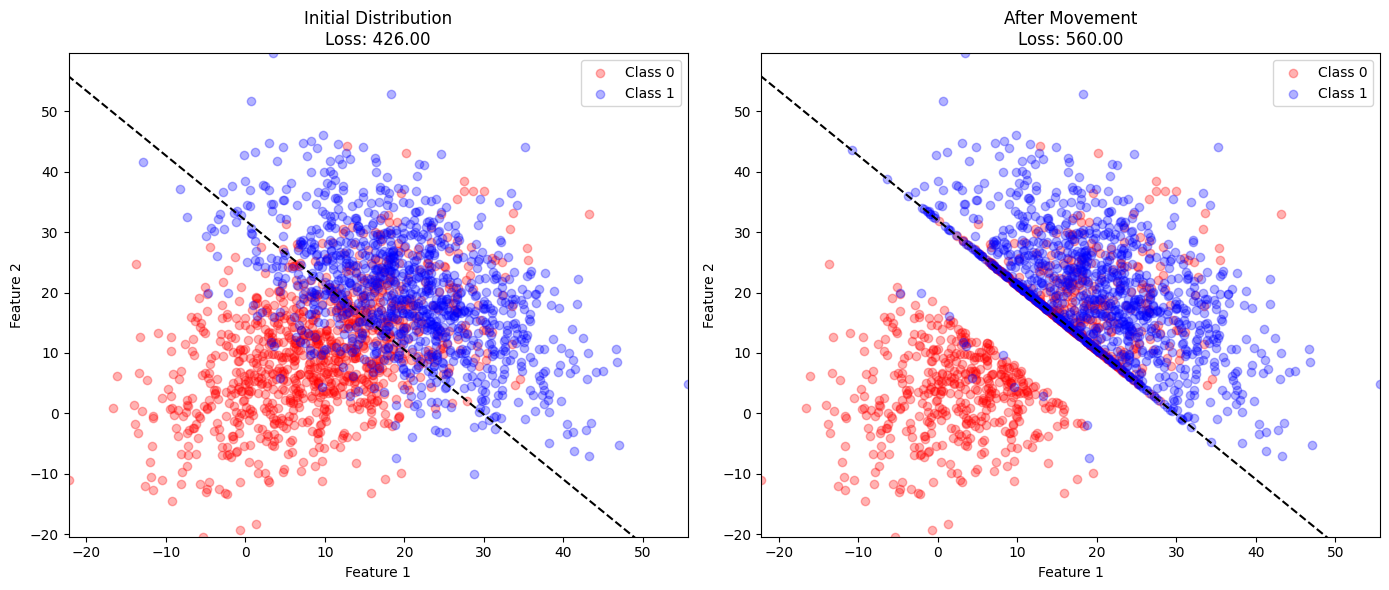

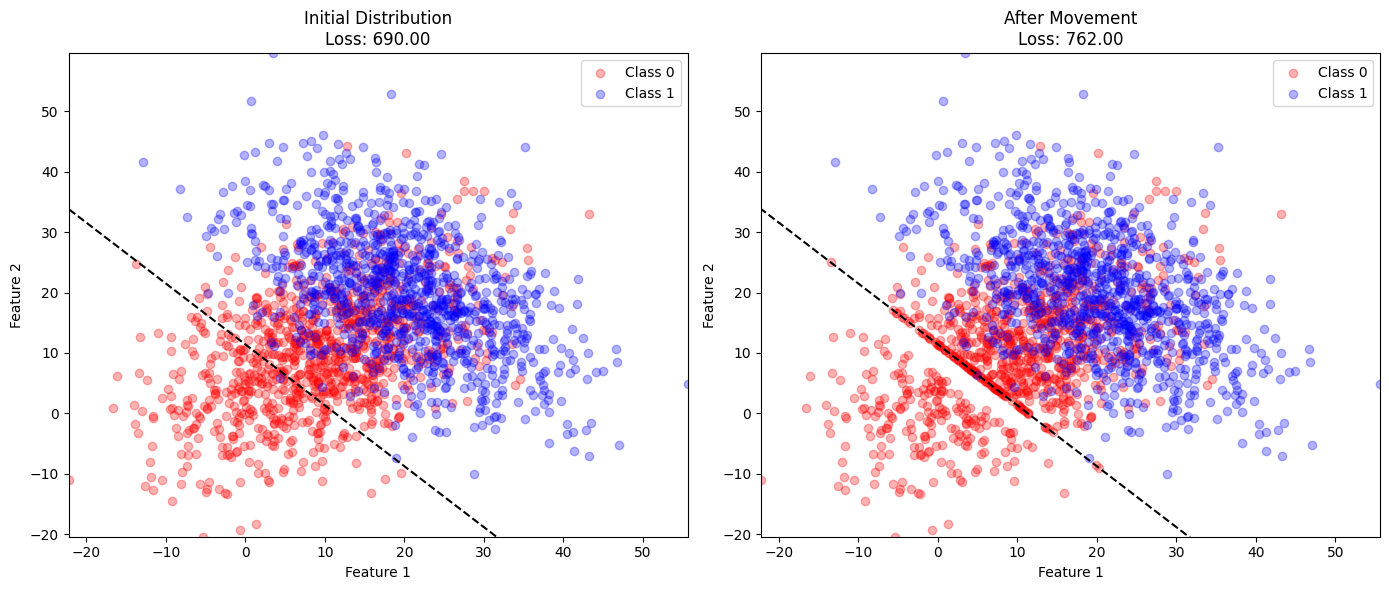

In [97]:
# Find the best decision boundary using LR
X = np.concatenate([X_0, X_1])
y = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])

# Fit the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)

print(clf.coef_, clf.intercept_)

# Decision boundary parameters
a, b = clf.coef_[0]
t = -clf.intercept_
B = 1.5  # Width of the region

plot_for(X_0, X_1, a, b, t, B)
# plot_for(X_0, X_1, a, b, t-B/2, B)

# Behavioral setting
gamma = 0.2
a_B = w(a, gamma)
b_B = w(b, gamma)
t_B = t

plot_for(X_0, X_1, a_B, b_B, t_B, B)